# Reading Data

In [36]:
import pandas as pd
import numpy as np
# Import Sci-kit Learn libraries for analysis
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Import visual Python libraries for statistical visualization
import seaborn as sns

In [12]:
df = pd.read_csv(r'C:\Users\kumar\Data Mining Project\results.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42650 entries, 0 to 42649
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        42650 non-null  int64 
 1   date              42650 non-null  object
 2   home_team         42650 non-null  object
 3   away_team         42650 non-null  object
 4   home_score        42650 non-null  int64 
 5   away_score        42650 non-null  int64 
 6   tournament        42650 non-null  object
 7   city              42650 non-null  object
 8   country           42650 non-null  object
 9   neutral           42650 non-null  bool  
 10  Full Time Result  42650 non-null  object
dtypes: bool(1), int64(3), object(7)
memory usage: 3.3+ MB


,Unnamed: 0,home_score,away_score
count,42650.000000,42650.000000,42650.000000
mean,21324.500000,1.743001,1.184830
std,12312.138827,1.752152,1.403128
min,0.000000,0.000000,0.000000
25%,10662.250000,1.000000,0.000000
50%,21324.500000,1.000000,1.000000
75%,31986.750000,2.000000,2.000000
max,42649.000000,31.000000,21.000000


In [13]:
df.describe(include=['O'])

,date,home_team,away_team,tournament,city,country,Full Time Result
count,42650,42650,42650,42650,42650,42650,42650
unique,15341,308,306,120,2051,266,3
top,2/29/2012,Brazil,Uruguay,Friendly,Kuala Lumpur,United States,Win
freq,66,582,548,17302,589,1224,20739


In [14]:
df[['neutral', 'home_score']].groupby(['neutral'], as_index=False).mean().sort_values(by='home_score', ascending=False)

,neutral,home_score
0,False,1.776375
1,True,1.641763


# Data Cleaning

In [15]:
#calculates the Full Time Result of the 
conditions = [df['home_score'] > df['away_score'], df['home_score'] < df['away_score']]
choices = ['Win', 'Loss']
df['Full Time Result'] = np.select(conditions, choices, default='Draw')

In [17]:
df.loc[df['tournament'] == 'FIFA World Cup']

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Full Time Result
1314,1314,7/13/1930,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,Loss
1315,1315,7/13/1930,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,Win
1316,1316,7/14/1930,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,Loss
1317,1317,7/14/1930,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,Loss
1318,1318,7/15/1930,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,Win
...,...,...,...,...,...,...,...,...,...,...,...
40003,40003,7/7/2018,Russia,Croatia,2,2,FIFA World Cup,Sochi,Russia,False,Draw
40004,40004,7/10/2018,France,Belgium,1,0,FIFA World Cup,St. Petersburg,Russia,True,Win
40005,40005,7/11/2018,Croatia,England,2,1,FIFA World Cup,Moscow,Russia,True,Win
40006,40006,7/14/2018,Belgium,England,2,0,FIFA World Cup,St. Petersburg,Russia,True,Win


In [19]:
df.corr()['home_score'].sort_values(ascending = False)

home_score    1.000000
neutral      -0.033175
Unnamed: 0   -0.094803
away_score   -0.137260
Name: home_score, dtype: float64

In [20]:
df.iloc[39943:40008]

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Full Time Result
39943,39943,6/14/2018,Russia,Saudi Arabia,5,0,FIFA World Cup,Moscow,Russia,False,Win
39944,39944,6/15/2018,Egypt,Uruguay,0,1,FIFA World Cup,Ekaterinburg,Russia,True,Loss
39945,39945,6/15/2018,Morocco,Iran,0,1,FIFA World Cup,St. Petersburg,Russia,True,Loss
39946,39946,6/15/2018,Portugal,Spain,3,3,FIFA World Cup,Sochi,Russia,True,Draw
39947,39947,6/16/2018,France,Australia,2,1,FIFA World Cup,Kazan,Russia,True,Win
...,...,...,...,...,...,...,...,...,...,...,...
40003,40003,7/7/2018,Russia,Croatia,2,2,FIFA World Cup,Sochi,Russia,False,Draw
40004,40004,7/10/2018,France,Belgium,1,0,FIFA World Cup,St. Petersburg,Russia,True,Win
40005,40005,7/11/2018,Croatia,England,2,1,FIFA World Cup,Moscow,Russia,True,Win
40006,40006,7/14/2018,Belgium,England,2,0,FIFA World Cup,St. Petersburg,Russia,True,Win


In [21]:
wc = df[39943:40008]
wc.drop([39999], axis=0, inplace = True)
wc.drop(df.columns[[0, 1]], axis = 1, inplace = True)

C:\Users\kumar\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [22]:
wc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 39943 to 40007
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   home_team         64 non-null     object
 1   away_team         64 non-null     object
 2   home_score        64 non-null     int64 
 3   away_score        64 non-null     int64 
 4   tournament        64 non-null     object
 5   city              64 non-null     object
 6   country           64 non-null     object
 7   neutral           64 non-null     bool  
 8   Full Time Result  64 non-null     object
dtypes: bool(1), int64(2), object(6)
memory usage: 4.6+ KB


In [23]:
wc.describe()

,home_score,away_score
count,64.000000,64.000000
mean,1.375000,1.265625
std,1.351072,0.929963
min,0.000000,0.000000
25%,0.000000,1.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,6.000000,3.000000


In [24]:
wc.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Full Time Result
39943,Russia,Saudi Arabia,5,0,FIFA World Cup,Moscow,Russia,False,Win
39944,Egypt,Uruguay,0,1,FIFA World Cup,Ekaterinburg,Russia,True,Loss
39945,Morocco,Iran,0,1,FIFA World Cup,St. Petersburg,Russia,True,Loss
39946,Portugal,Spain,3,3,FIFA World Cup,Sochi,Russia,True,Draw
39947,France,Australia,2,1,FIFA World Cup,Kazan,Russia,True,Win


In [7]:
#Creates two dataframes where wc is the regular world cup data and wce is the encoded world cup data 
wc = pd.read_csv(r'C:\Users\kumar\Data Mining Project\worldcup.csv')
wce = pd.read_csv(r'C:\Users\kumar\Data Mining Project\worldcup.csv')
wc

,Match,home_team,away_team,home_score,away_score,tournament,city,country,neutral,FTR,HTW Odds,HTD Odds,HTL Odds,Penalties
0,63,France,Croatia,4,2,FIFA World Cup,Moscow,Russia,True,Win,116,206,328,N
1,62,Belgium,England,2,0,FIFA World Cup,St. Petersburg,Russia,True,Win,119,284,224,N
2,61,Croatia,England,2,1,FIFA World Cup,Moscow,Russia,True,Win,293,200,127,N
3,60,France,Belgium,1,0,FIFA World Cup,St. Petersburg,Russia,True,Win,161,214,208,N
4,59,Russia,Croatia,2,2,FIFA World Cup,Sochi,Russia,False,Loss,309,216,114,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,4,France,Australia,2,1,FIFA World Cup,Kazan,Russia,True,Win,-385,625,967,N
60,3,Portugal,Spain,3,3,FIFA World Cup,Sochi,Russia,True,Draw,345,225,102,N
61,2,Morocco,Iran,0,1,FIFA World Cup,St. Petersburg,Russia,True,Loss,123,198,321,N
62,1,Egypt,Uruguay,0,1,FIFA World Cup,Ekaterinburg,Russia,True,Loss,741,309,-196,N


### Variable Names

In [8]:
#neutral = if home team is from the country where the game is being played at. For World Cup 2018, Russia was the only country
#FTR = Full Time Result
#HTW Odds - Betting odds that the home team wins
#HTD Odds - Betting odds that the home team draws
#HTL Odds - Betting odds that the home team loses
#The smaller the betting odds, the more likely that result is predicted to happen
#Penalties - If result was from penalty shootout, the column is marked with a Y

# Data Preprocessing
##### Turns features into integers for neural network

### Splitting into Training and Testing Sets

In [9]:
# Creating labelEncoder
le = preprocessing.LabelEncoder()

wce['home_team'] = le.fit_transform(wce['home_team'])
wce['away_team'] = le.fit_transform(wce['away_team'])
wce['neutral'] = le.fit_transform(wce['neutral'])
wce['FTR'] = le.fit_transform(wce['FTR'])
wce['Penalties'] = le.fit_transform(wce['Penalties'])

In [10]:
X = wce[['home_team', 'away_team', 'neutral', 'HTW Odds', 'HTD Odds', 'HTL Odds', 'Penalties']]
y = wce['FTR']
#Default training and testing set proportions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% training and 20% test


# Multi-layer Perceptron [MLP] Classifier Results

In [31]:
# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=False,
                    learning_rate_init=0.005)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)  # 70% training and 30% test
# Fit data onto the model
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

#Prints accuracy score
accuracy_score(y_test,y_pred)


0.75

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.60      0.75        10
           2       0.64      1.00      0.78         9

    accuracy                           0.75        20
   macro avg       0.55      0.53      0.51        20
weighted avg       0.79      0.75      0.73        20



C:\Users\kumar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kumar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kumar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree Classifier

In [33]:
clf = DecisionTreeClassifier(criterion="entropy", splitter = 'random', max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Prints accuracy score
accuracy_score(y_test,y_pred)

0.6

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.62      0.80      0.70        10
           2       0.57      0.44      0.50         9

    accuracy                           0.60        20
   macro avg       0.40      0.41      0.40        20
weighted avg       0.56      0.60      0.57        20



C:\Users\kumar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kumar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kumar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Support Vector Machine Classification

In [27]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)  # 65% training and 35% test


#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Prints accuracy score
accuracy_score(y_test,y_pred)

0.5652173913043478

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.62      0.67      0.64        12
           2       0.56      0.56      0.56         9

    accuracy                           0.57        23
   macro avg       0.39      0.41      0.40        23
weighted avg       0.54      0.57      0.55        23



# Random Forest Classifier

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)  # 60% training and 40% test

#Create a Random Forest Classifier
rfc = RandomForestClassifier(random_state = 42)

#Train the model using the training sets
rfc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = rfc.predict(X_test)

#Prints accuracy score
accuracy_score(y_test,y_pred)

0.5384615384615384

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.80      0.57      0.67        14
           2       0.43      0.60      0.50        10

    accuracy                           0.54        26
   macro avg       0.41      0.39      0.39        26
weighted avg       0.60      0.54      0.55        26



# Visualizing Data

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


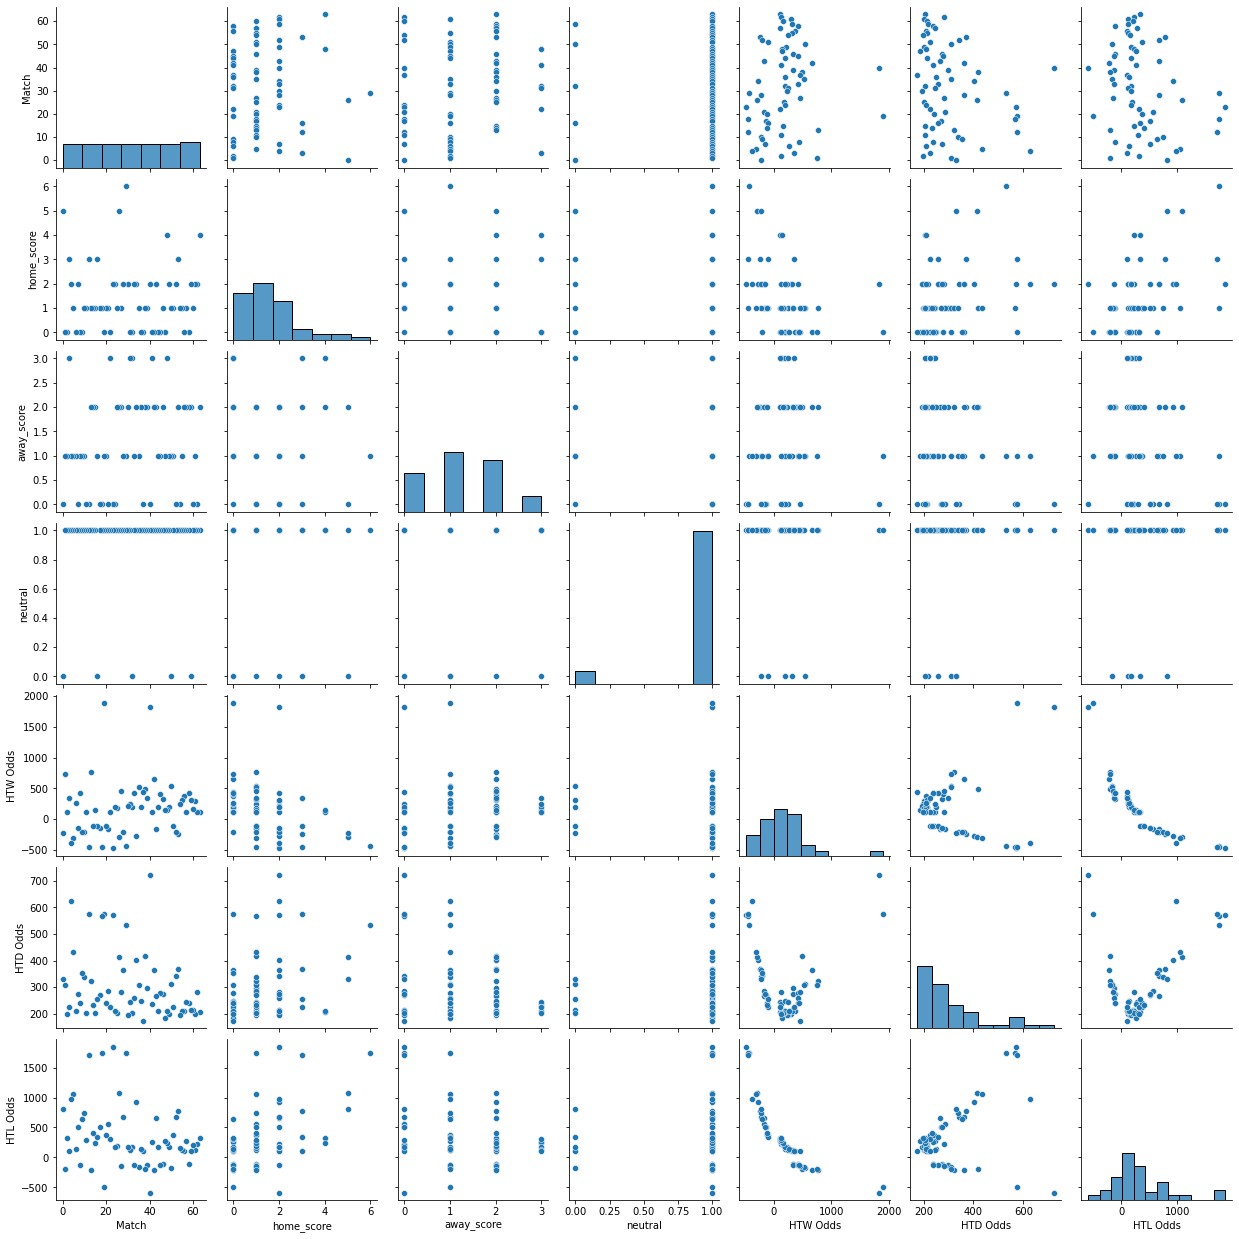

In [15]:
sns.pairplot(wc)

C:\Users\kumar\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


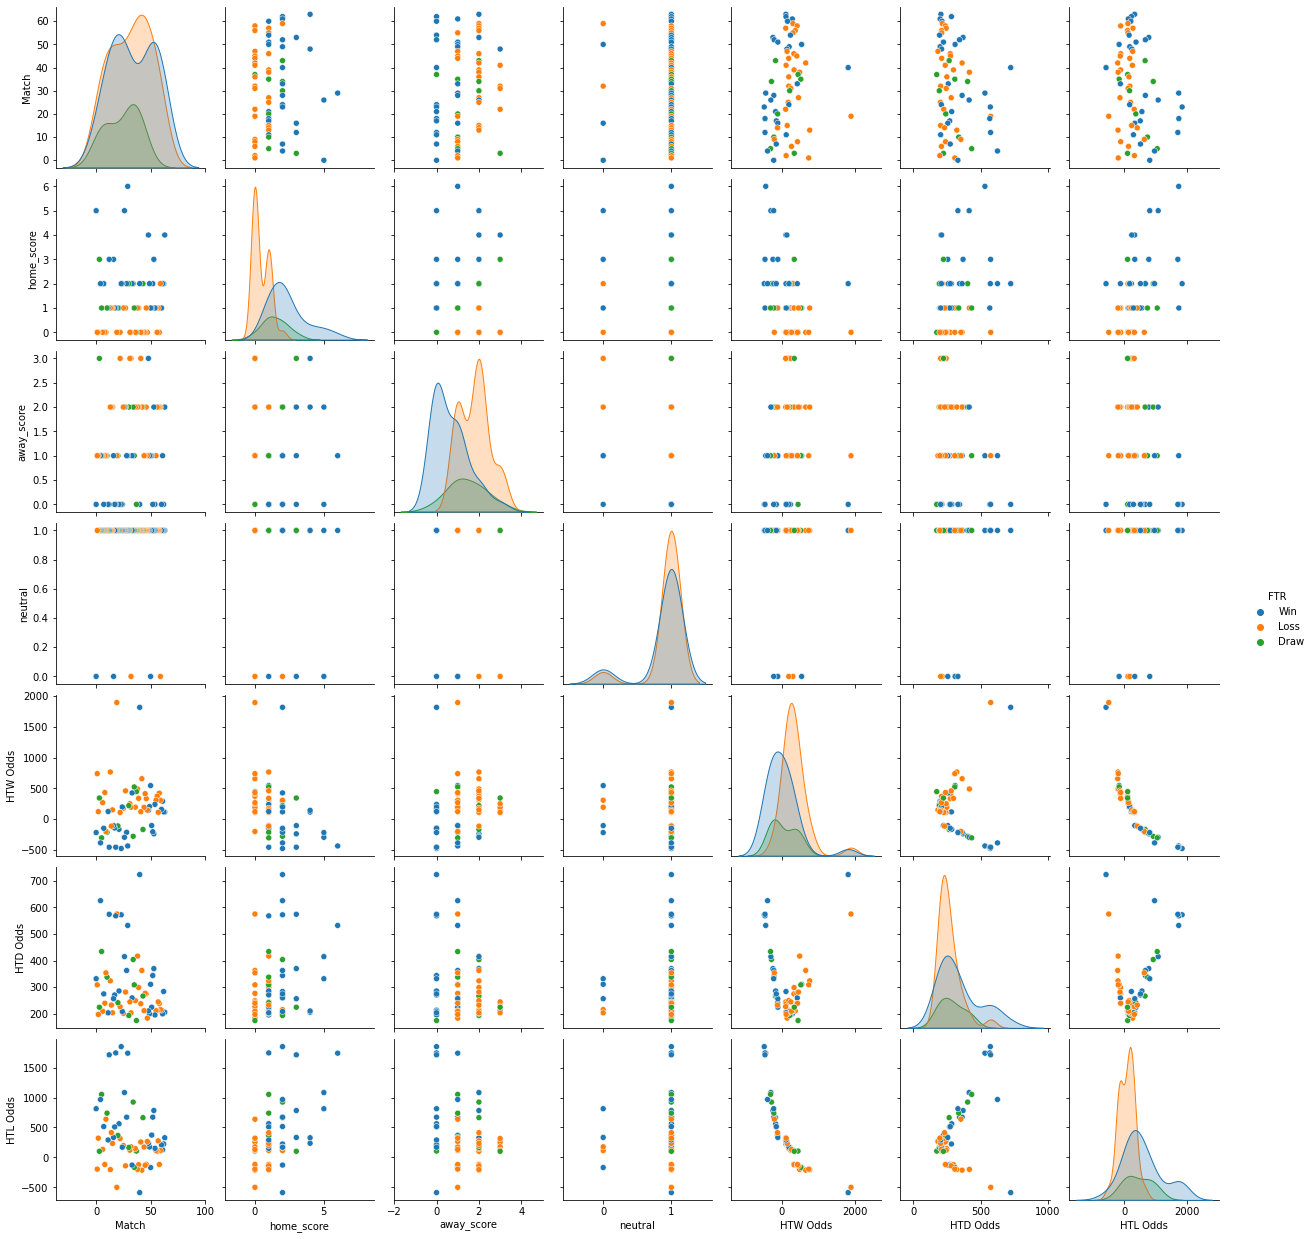

In [16]:
sns.pairplot(wc, hue = 'FTR')

<AxesSubplot:>

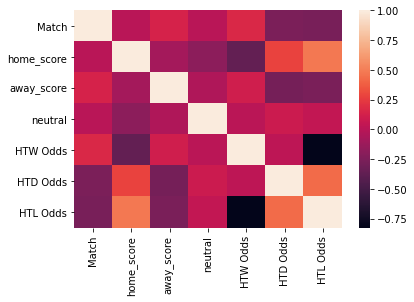

In [17]:
sns.heatmap(wc.corr())

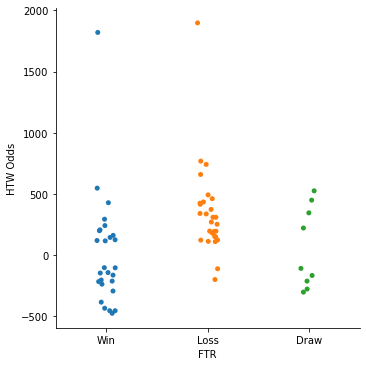

In [18]:
sns.catplot(x=wc['FTR'], y=wc['HTW Odds'], data=wc)

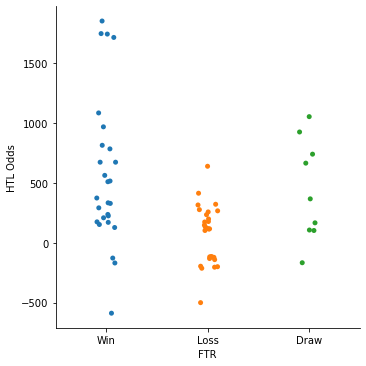

In [19]:
sns.catplot(x=wc['FTR'], y=wc['HTL Odds'], data=wc)